<a href="https://colab.research.google.com/github/Machocho254/DS_CORE_WEEK4/blob/master/Moringa_Data_Science_CORE_W4_Independent_Project_2019_12_Machocho_Mengo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOLIB DATA ANALYSIS AND STATISTICAL INFERENCES**

**Requirements**



1.   Is the number of Bluecars taken in area X different than in area Y? 

2.   Is the number of Bluecars taken  greater in area X than in area Z?

3.  What is the most popular time of the week, (weekday vs weekend)

4.  Is Bluecar the most popular car?



# **LOADING AND READING THE DATASET** 

The data used in this study has been obtained from http://bit.ly/DSCoreAutolibDataset and the description to the dataset will be uploaded onto this notebook. 

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

In [0]:
# import all the required libraries for this dataset

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import math
import statistics
import matplotlib.pyplot as plt



In [17]:
# uploading the dataset and creating the dataframe to be used. 

autolib_df = pd.read_csv("/content/autolib_daily_events_postal_code.csv")
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [34]:
# reading the variable descriptions
var_df = pd.read_excel("/content/columns_explanation.xlsx", sheet_name=None)
var_df


#                Column name                                        explanation
# 0              Postal code                 postal code of the area (in Paris)
              # 1                     date                        date of the row aggregation
              # 2      n_daily_data_points  number of daily data poinst that were availabl...
              # 3                dayOfWeek     identifier of weekday (0: Monday -> 6: Sunday)
              # 4                 day_type                                 weekday or weekend
              # 5       BlueCars_taken_sum    Number of bluecars taken that date in that area
              # 6    BlueCars_returned_sum  Number of bluecars returned that date in that ...
              # 7         Utilib_taken_sum      Number of Utilib taken that date in that area
              # 8      Utilib_returned_sum   Number of Utilib returned that date in that area
              # 9      Utilib_14_taken_sum  Number of Utilib 1.4 taken that date in that area
              # 10  Utilib_14_returned_sum  Number of Utilib 1.4 returned that date in tha...
              # 11         Slots_freed_sum  Number of recharging slots released that date ...
              # 12         Slots_taken_sum  Number of rechargign slots taken that date in ...)])

OrderedDict([('Sheet1',
                             Column name                                        explanation
              0              Postal code                 postal code of the area (in Paris)
              1                     date                        date of the row aggregation
              2      n_daily_data_points  number of daily data poinst that were availabl...
              3                dayOfWeek     identifier of weekday (0: Monday -> 6: Sunday)
              4                 day_type                                 weekday or weekend
              5       BlueCars_taken_sum    Number of bluecars taken that date in that area
              6    BlueCars_returned_sum  Number of bluecars returned that date in that ...
              7         Utilib_taken_sum      Number of Utilib taken that date in that area
              8      Utilib_returned_sum   Number of Utilib returned that date in that area
              9      Utilib_14_taken_sum  Number of Util

In [19]:
# checking the first observations of the dataset
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [20]:
# checking the last observations of the dataset
autolib_df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [21]:
# getting the information about the data
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# **DATA DESCRIPTION AND CLEANING**

To get the descriptive statistics of the dataset. 

To clean the data, check for outliers, missing data and filling in th data where appropriate. 

In [22]:
# Desscriptive statistics of the dataset
autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [23]:
#Describe Non Integer variables
df_cat = autolib_df.dtypes[autolib_df.dtypes == 'object'].index
autolib_df[df_cat].describe()

# NOn interger variables are date and day_type which are objects
# there are 16085 observations for each of the variables
# 

,date,day_type
count,16085,16085
unique,156,2
top,5/22/2018,weekday
freq,104,11544


In [24]:
#Unique values for each column.
autolib_df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [25]:
# changing day of the week into boolian data type 
autolib_df['day_type'] = autolib_df.day_type.map({'weekday': 0, 'weekend': 1})
autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,0,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,0,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,0,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,0,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,0,114,117,3,3,6,6,18,20


In [31]:
# dropping the date column 
new_df = autolib_df.drop(['date'], axis = 1)
new_df 

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1440,0,0,110,103,3,2,10,9,22,20
1,75001,1438,1,0,98,94,1,1,8,8,23,22
2,75001,1439,2,0,138,139,0,0,2,2,27,27
3,75001,1320,3,0,104,104,2,2,9,8,25,21
4,75001,1440,4,0,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,1440,4,0,15,10,0,0,2,3,0,0
16081,95880,1440,5,1,19,19,0,0,2,1,0,0
16082,95880,1440,6,1,33,35,1,1,0,0,0,0
16083,95880,1440,0,0,11,14,3,5,2,2,0,0


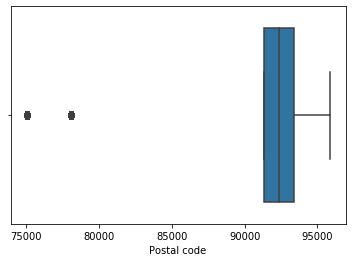

In [26]:
# checking for outliers for postal code
import seaborn as sns
sns.boxplot(x=autolib_df['Postal code'])

# there are outliers in this dataset. 
# postal codes between 75000 and 80000 are outliers

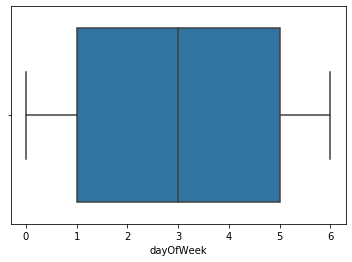

In [39]:
# checking outliers for dayOFweek
sns.boxplot(x=autolib_df['dayOfWeek'])
#  most of the observations are concetrated during the first and 5th day of the week

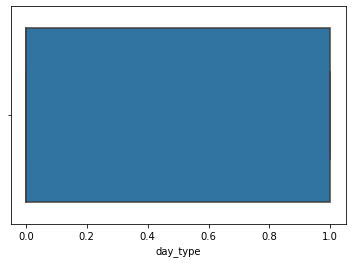

In [30]:
# checkin outliers for day type
import seaborn as sns
sns.boxplot(x=autolib_df['day_type'])

In [32]:
# using the Z score to check for outliers
z = np.abs(stats.zscore(new_df))
print(z)

[[1.8033354  0.26103932 1.47865161 ... 0.03114623 0.01206926 0.05042308]
 [1.8033354  0.20081834 0.98072189 ... 0.04656234 0.00711774 0.01206806]
 [1.8033354  0.23092883 0.48279216 ... 0.51281378 0.0838657  0.0838195 ]
 ...
 [0.92697914 0.26103932 1.50892673 ... 0.66823093 0.43418308 0.43397331]
 [0.92697914 0.26103932 1.47865161 ... 0.51281378 0.43418308 0.43397331]
 [0.92697914 1.84669495 0.98072189 ... 0.66823093 0.43418308 0.43397331]]


In [35]:
# checking the shape of the dataset
autolib_df.shape

(16085, 13)

In [38]:
# removing outliers
autolib_df_o = autolib_df[(z < 3).all(axis=1)]
autolib_df_o.shape

(14908, 13)

# **UNIVARIATE ANALYSIS**

Analysis of each variavle.



1.   Measures of central tendencies
2.   Measure of dispersion
3.   Data visualization



In [40]:
# getting the frequency table for day type variable

autolib_df['day_type'].value_counts()

# weekdays (represented by 0) has the frequency of 11544 
# weekends has 4541 observations.
# there is more business on weekdays vs the weekends. 


0    11544
1     4541
Name: day_type, dtype: int64

In [41]:
# getting the frequency table for the dayOfweek
autolib_df['dayOfWeek'].value_counts()

# Monday and Tuesday have the most frequencies
# There is more traffic on monday and tuesday. 

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: dayOfWeek, dtype: int64

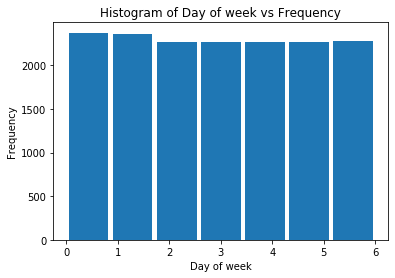

In [47]:
# histogram of day of week frequencies
day_week = autolib_df['dayOfWeek']

plt.hist(day_week, bins=7, histtype='bar', rwidth=0.9)
plt.xlabel('Day of week')
plt.ylabel('Frequency')
plt.title('Histogram of Day of week vs Frequency')
plt.show()

In [52]:
# frequency table of the postal code
autolib_df['Postal code'].value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: Postal code, Length: 104, dtype: int64

In [0]:
# measures of central tendencies
# mean

mean_bluecarRT = autolib_df['BlueCars_returned_sum'].mean() #mean of sum returned bluecars
print (mean_bluecar)

print("/n")

mean_bluecarTK = autolib_df['BlueCars_taken_sum'].mean() #mean of taken bluecars
print(mean_bluecarTK)

 

In [0]:
# measures of dispersion and spread 
# variance
var_bluecarRT = autolib_df['BlueCars_returned_sum'].var() #variance of returned Bluecars 
print (var_bluecarRT)

print("/n")

var_bluecarTK = autolib_df['BlueCars_taken_sum'].var() #variance of taken Bluecars
print (var_bluecarTK)




# **BIVARIATE ANALYSIS**

# **HYPOTHESIS TESTING**